## Network Topology (f)

In [1]:
from neuralnet import *
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt

# Load the configuration.
config = load_config("./data")


In [2]:
# Load model parameters
# TODO: GET BEST PARAMS FROM (e) Activation
config = {}
config['learning_rate'] = 0.005
config['batch_size'] = 256
config['epochs'] = 165
config['early_stop'] = True 
config['early_stop_epoch'] = 5
config['L2_penalty'] = 0.005  
config['momentum'] = True  
config['momentum_gamma'] = 0.9  
config['activation'] = 'sigmoid'

# Test different network topologies
default_topology = [3072, 64, 64, 10]



In [3]:
# Load the data
X_train, y_train, X_stats = load_data(path="./data", stats=None, mode="train")
X_test, y_test = load_data(path="./data", stats=X_stats, mode="test")
X_train, y_train, X_valid, y_valid = split_data(X_train,y_train)


(50000, 32, 32, 3)


In [4]:
# Plots topology config
# Expects up to 4 different topologies
def plot_topology_config(network_topologies, config, plot_name):
    all_train_loss_record = []
    all_train_acc_record = []

    all_valid_loss_record = []
    all_valid_acc_record = []

    all_test_acc_record = []

    all_epoch_record = []
    for topology in network_topologies:
        config['layer_specs'] = topology
        model = Neuralnetwork(config)
        epoch,train_loss_record, train_accuracy_record, valid_loss_record, valid_accuracy_record = train(model,X_train,y_train,X_valid,y_valid,config)
        all_epoch_record.append(epoch)
        all_train_loss_record.append(train_loss_record)
        all_train_acc_record.append(train_accuracy_record)
        all_valid_loss_record.append(valid_loss_record)
        all_valid_acc_record.append(valid_accuracy_record)

        # Recall parameters with minimum validation loss
        model.save_load_weight(save=False) # load best weights
        test_accuracy = test(model, X_test, y_test) 
        all_test_acc_record.append(test_accuracy)
    
    num_epochs = [i for i in range(config['epochs'])]

    ## Plot train and valid loss on one graph

    # Line type
    train_loss_lt = ['-b', '-r', '-g', '-k']
    valid_loss_lt = ['--b', '--r', '--g', '--k']

    for i, topology in enumerate(network_topologies):
        plt.plot(num_epochs[:all_epoch_record[i]+1], all_train_loss_record[i], train_loss_lt[i], label=f"Train Loss: {topology}")
        plt.plot(num_epochs[:all_epoch_record[i]+1], all_valid_loss_record[i], valid_loss_lt[i], label=f"Valid Loss: {topology}")
    plt.xlabel('Epochs')
    plt.ylabel('Normalized Loss')
    plt.title("Train and Validation Loss vs. Epochs")
    plt.legend()
    plt.savefig(f'plots/(f)_{plot_name}_loss.png')
    plt.show()

    ## Plot Train and valid acc on another

    # Line type
    train_acc_lt = ['-b', '-r', '-g', '-k']
    valid_acc_lt = ['--b', '--r', '--g', '--k']

    for i, topology in enumerate(network_topologies):
        plt.plot(num_epochs[:all_epoch_record[i]+1], all_train_acc_record[i], train_acc_lt[i], label=f"Train Acc: {topology}")
        plt.plot(num_epochs[:all_epoch_record[i]+1], all_valid_acc_record[i], valid_acc_lt[i], label=f"Valid Acc: {topology}")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title("Train and Validation Accuracy vs. Epochs")
    plt.legend()
    plt.savefig(f'plots/(f)_{plot_name}_acc.png')
    plt.show()

    # Report final test accuracy
    for i, topology in enumerate(network_topologies):
        print(f"Final Test Accuracy for {topology}: {all_test_acc_record[i]:.4f}")
        
    print()


Epoch: 1, train accuracy: 0.2362, train_loss_norm:0.2975, valid_acc: 0.2378, valid_loss_norm: 0.2323
Valid loss going down!
Epoch: 2, train accuracy: 0.2972, train_loss_norm:0.2080, valid_acc: 0.2748, valid_loss_norm: 0.2104
Valid loss going down!
Epoch: 3, train accuracy: 0.3268, train_loss_norm:0.1966, valid_acc: 0.3010, valid_loss_norm: 0.1990
Valid loss going down!
Epoch: 4, train accuracy: 0.3447, train_loss_norm:0.1909, valid_acc: 0.3046, valid_loss_norm: 0.1980
Valid loss going down!
Epoch: 5, train accuracy: 0.3618, train_loss_norm:0.1860, valid_acc: 0.3136, valid_loss_norm: 0.1980
Valid loss going down!
Epoch: 6, train accuracy: 0.3693, train_loss_norm:0.1831, valid_acc: 0.3380, valid_loss_norm: 0.1875
Valid loss going down!
Epoch: 7, train accuracy: 0.3805, train_loss_norm:0.1796, valid_acc: 0.3402, valid_loss_norm: 0.1897
Valid loss go up!
Current patience count: 1
Epoch: 8, train accuracy: 0.3871, train_loss_norm:0.1771, valid_acc: 0.3444, valid_loss_norm: 0.1861
Valid loss

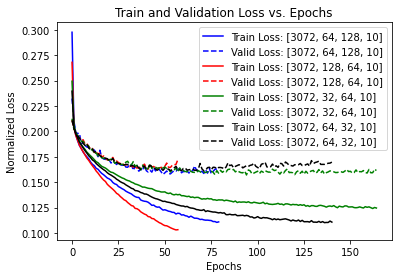

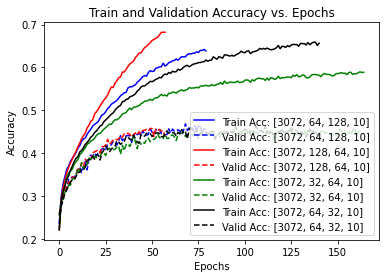

Final Test Accuracy for [3072, 64, 128, 10]: 0.4674
Final Test Accuracy for [3072, 128, 64, 10]: 0.4555
Final Test Accuracy for [3072, 32, 64, 10]: 0.4555
Final Test Accuracy for [3072, 64, 32, 10]: 0.4468



In [5]:
## (i) Modify number of hidden units

# Total weight params ~= 3072 * 64 + 64 * 64 + 64 * 10 = 201,344
network_topologies = [
    [3072, 64, 128, 10],
    [3072, 128, 64, 10],
    [3072, 32, 64, 10],
    [3072, 64, 32, 10],
]
plot_name = 'i_hu'
plot_topology_config(network_topologies, config, plot_name)


Epoch: 1, train accuracy: 0.2091, train_loss_norm:0.2445, valid_acc: 0.2398, valid_loss_norm: 0.2177
Valid loss going down!
Epoch: 2, train accuracy: 0.2720, train_loss_norm:0.2093, valid_acc: 0.2774, valid_loss_norm: 0.2055
Valid loss going down!
Epoch: 3, train accuracy: 0.3047, train_loss_norm:0.2013, valid_acc: 0.2722, valid_loss_norm: 0.2031
Valid loss going down!
Epoch: 4, train accuracy: 0.3239, train_loss_norm:0.1953, valid_acc: 0.3040, valid_loss_norm: 0.1962
Valid loss going down!
Epoch: 5, train accuracy: 0.3404, train_loss_norm:0.1913, valid_acc: 0.3084, valid_loss_norm: 0.1970
Valid loss go up!
Current patience count: 1
Epoch: 6, train accuracy: 0.3510, train_loss_norm:0.1879, valid_acc: 0.3200, valid_loss_norm: 0.1935
Valid loss going down!
Epoch: 7, train accuracy: 0.3632, train_loss_norm:0.1845, valid_acc: 0.3264, valid_loss_norm: 0.1915
Valid loss going down!
Epoch: 8, train accuracy: 0.3733, train_loss_norm:0.1818, valid_acc: 0.3424, valid_loss_norm: 0.1868
Valid loss

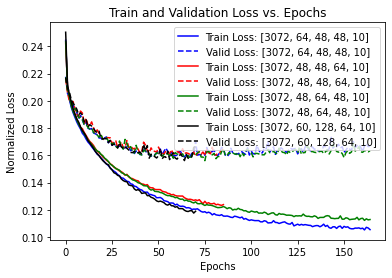

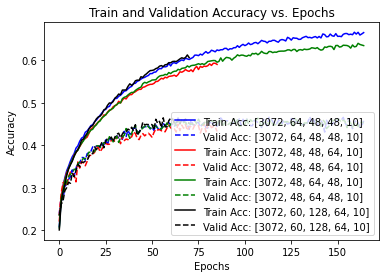

Final Test Accuracy for [3072, 64, 48, 48, 10]: 0.4517
Final Test Accuracy for [3072, 48, 48, 64, 10]: 0.4425
Final Test Accuracy for [3072, 48, 64, 48, 10]: 0.4626
Final Test Accuracy for [3072, 60, 128, 64, 10]: 0.4521



In [6]:
## (ii) Increase # of hidden layers

# Total weight params ~= 201,344

network_topologies = [
    [3072, 64, 48, 48, 10], # 202,464
    [3072, 48, 48, 64, 10], # 202,464
    [3072, 48, 64, 48, 10], # 202,464
    [3072, 60, 128, 64, 10], # 200,832
]
plot_name = 'ii_inc_hl'
plot_topology_config(network_topologies, config, plot_name)

Epoch: 1, train accuracy: 0.2345, train_loss_norm:0.2961, valid_acc: 0.2708, valid_loss_norm: 0.2079
Valid loss going down!
Epoch: 2, train accuracy: 0.3122, train_loss_norm:0.1982, valid_acc: 0.2956, valid_loss_norm: 0.2003
Valid loss going down!
Epoch: 3, train accuracy: 0.3278, train_loss_norm:0.1934, valid_acc: 0.3048, valid_loss_norm: 0.1965
Valid loss going down!
Epoch: 4, train accuracy: 0.3400, train_loss_norm:0.1903, valid_acc: 0.3190, valid_loss_norm: 0.1943
Valid loss going down!
Epoch: 5, train accuracy: 0.3518, train_loss_norm:0.1874, valid_acc: 0.3206, valid_loss_norm: 0.1921
Valid loss going down!
Epoch: 6, train accuracy: 0.3570, train_loss_norm:0.1860, valid_acc: 0.3284, valid_loss_norm: 0.1910
Valid loss going down!
Epoch: 7, train accuracy: 0.3634, train_loss_norm:0.1840, valid_acc: 0.3270, valid_loss_norm: 0.1922
Valid loss go up!
Current patience count: 1
Epoch: 8, train accuracy: 0.3682, train_loss_norm:0.1827, valid_acc: 0.3404, valid_loss_norm: 0.1887
Valid loss

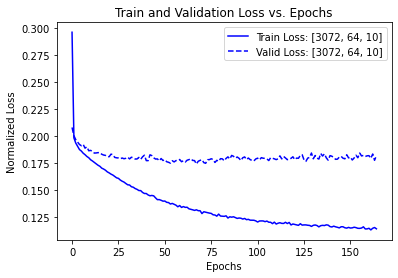

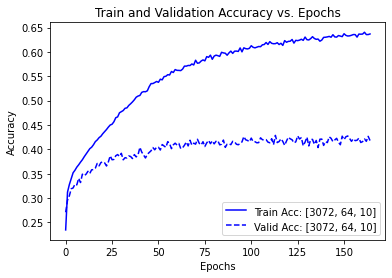

Final Test Accuracy for [3072, 64, 10]: 0.4242



In [7]:
## (iii) Decrease # of hidden layers

# Total weight params ~= 201,344
network_topologies = [
    [3072, 64, 10], # 197,248
]
plot_name = 'iii_dec_hl'
plot_topology_config(network_topologies, config, plot_name)